In [1]:
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)
x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [5]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [6]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

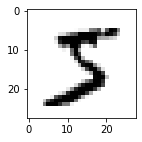

In [7]:
plot_image(x_Train[0])

In [8]:
y_Train[0]

5

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

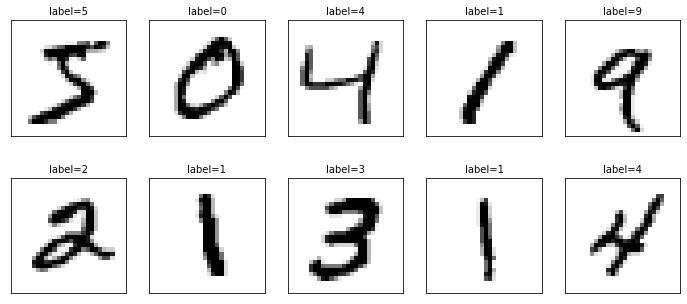

In [10]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

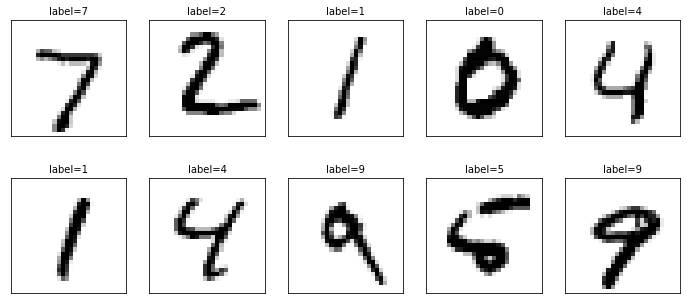

In [11]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [12]:
x_Train.shape
#60000筆,28pixels,28pixels

(60000, 28, 28)

In [13]:
#多加一個顏色的維度
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [14]:
x_Train4D.shape

(60000, 28, 28, 1)

In [15]:
#將數值縮小到0~1
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255


In [16]:
#把類別作onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [17]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
#建立CNN模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D


In [20]:
#程序(疊加)
model = Sequential()

In [21]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [22]:
#maxpooling size=(2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [26]:
#平坦化
model.add(Flatten())

In [27]:

model.add(Dense(128, activation='relu'))


In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [31]:
#train model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [32]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 25s - loss: 0.4896 - accuracy: 0.8462 - val_loss: 0.1040 - val_accuracy: 0.9691
Epoch 2/20
 - 24s - loss: 0.1424 - accuracy: 0.9582 - val_loss: 0.0674 - val_accuracy: 0.9791
Epoch 3/20
 - 23s - loss: 0.1048 - accuracy: 0.9688 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 4/20
 - 23s - loss: 0.0856 - accuracy: 0.9746 - val_loss: 0.0479 - val_accuracy: 0.9858
Epoch 5/20
 - 23s - loss: 0.0732 - accuracy: 0.9772 - val_loss: 0.0424 - val_accuracy: 0.9873
Epoch 6/20
 - 23s - loss: 0.0653 - accuracy: 0.9801 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 7/20
 - 23s - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0383 - val_accuracy: 0.9895
Epoch 8/20
 - 23s - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 9/20
 - 24s - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0354 - val_accuracy: 0.9899
Epoch 10/20
 - 25s - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0336 - val_accuracy: 0.9906
Epoch 11/

In [43]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [47]:
show_train_history('acc','val_acc')

KeyError: 'acc'

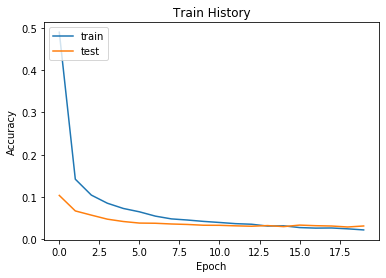

In [45]:
show_train_history('loss','val_loss')

In [48]:

scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 148us/step


0.9929999709129333

In [49]:
prediction=model.predict_classes(x_Test4D_normalize)


In [50]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [51]:

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

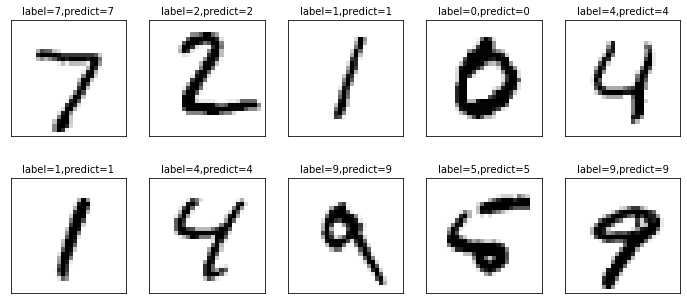

In [52]:

plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [53]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1133,0,0,0,0,1,1,0,0
2,0,2,1028,0,1,0,0,1,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,981,0,0,0,0,1
5,2,0,0,5,0,883,1,0,0,1
6,2,2,0,0,3,1,950,0,0,0
7,0,2,6,0,0,0,0,1018,1,1
8,3,0,3,1,0,1,1,0,963,2


In [54]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})


In [55]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


In [56]:

df[(df.label==5)&(df.predict==3)].index

Int64Index([340, 1393, 2035, 2597, 5937], dtype='int64')

IndexError: list index out of range

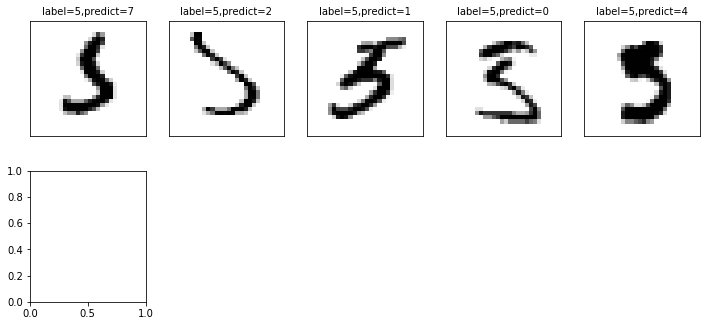

In [58]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)